In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [7]:
data=pd.read_csv('/Users/rishismac/Desktop/UpGrad/loan.csv')
data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.shape

(39717, 111)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   desc                        26775 non-null  object 
 1   emp_title                   37258 non-null  object 
 2   emp_length                  38642 non-null  object 
 3   pub_rec_bankruptcies        39020 non-null  float64
 4   last_pymnt_d                39646 non-null  object 
 5   collections_12_mths_ex_med  39661 non-null  float64
 6   chargeoff_within_12_mths    39661 non-null  float64
 7   revol_util                  39667 non-null  object 
 8   tax_liens                   39678 non-null  float64
 9   title                       39706 non-null  object 
 10  last_credit_pull_d          39715 non-null  object 
 11  id                          39717 non-null  int64  
 12  member_id                   39717 non-null  int64  
 13  loan_amnt                   397

### Missing value check:

In [81]:
na_dict=dict(data.isna().mean()*100)
na_dict_desc=[[w,na_dict[w]] for w in sorted(na_dict,key=na_dict.get,reverse=True)]
na_dict_desc
na_df=pd.DataFrame(na_dict_desc)
na_df.columns=['attribute','perc_na']

cleaned_na_df=na_df[na_df['perc_na']<40]
attr_accepted=list(cleaned_na_df.attribute)
attr_accepted
data=data[attr_accepted]
data.shape


(39717, 54)

In [89]:
d=dict(data.nunique())
d

{'desc': 26526,
 'emp_title': 28820,
 'emp_length': 11,
 'pub_rec_bankruptcies': 3,
 'last_pymnt_d': 101,
 'collections_12_mths_ex_med': 1,
 'chargeoff_within_12_mths': 1,
 'revol_util': 1089,
 'tax_liens': 1,
 'title': 19615,
 'last_credit_pull_d': 106,
 'id': 39717,
 'member_id': 39717,
 'loan_amnt': 885,
 'funded_amnt': 1041,
 'funded_amnt_inv': 8205,
 'term': 2,
 'int_rate': 371,
 'installment': 15383,
 'grade': 7,
 'sub_grade': 35,
 'home_ownership': 5,
 'annual_inc': 5318,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 3,
 'pymnt_plan': 1,
 'url': 39717,
 'purpose': 14,
 'zip_code': 823,
 'addr_state': 50,
 'dti': 2868,
 'delinq_2yrs': 11,
 'earliest_cr_line': 526,
 'inq_last_6mths': 9,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21711,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1137,
 'out_prncp_inv': 1138,
 'total_pymnt': 37850,
 'total_pymnt_inv': 37518,
 'total_rec_prncp': 7976,
 'total_rec_int': 35148,
 'total_rec_late_fee': 1356,
 'recoveries':

In [92]:
num_variables=[]
cat_variables=[]
del_variables=[]
for i in d:
    if d[i]==1 or d[i]>25000:
        del_variables.append(i)
    elif d[i]>1 and d[i]<40:
        cat_variables.append(i)
    elif d[i]>40:
        num_variables.append(i)
        
        
        
print(num_variables)
print(cat_variables)
print(del_variables)


['last_pymnt_d', 'revol_util', 'title', 'last_credit_pull_d', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
['emp_length', 'pub_rec_bankruptcies', 'term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec']
['desc', 'emp_title', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'id', 'member_id', 'pymnt_plan', 'url', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


  # Segmented univariate analysis on various columns:
  

### fund amount vs defaulter:

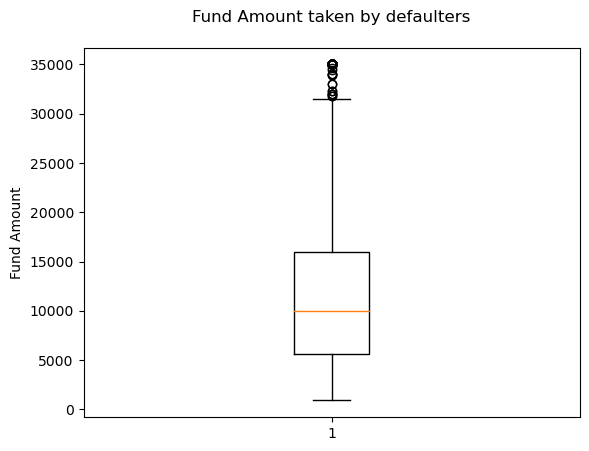

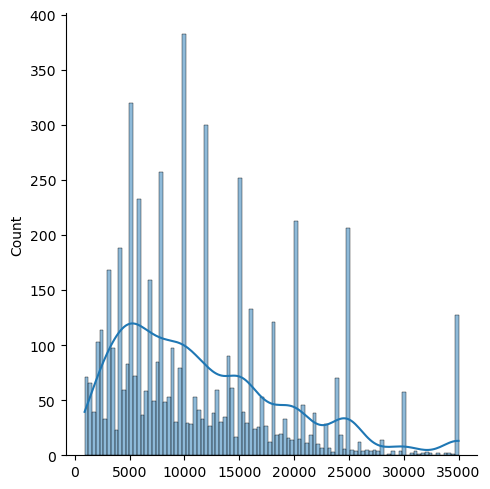

It is visible that customers who took a loan amount of  10000.0 and around


In [37]:
filtered=data[['funded_amnt','loan_status']]
arr=filtered[filtered['loan_status']=='Charged Off']
faulty_funds=list(arr['funded_amnt'])
plt.boxplot(faulty_funds)
plt.title('Fund Amount taken by defaulters\n')
plt.ylabel('Fund Amount')
import seaborn as sns
sns.displot(faulty_funds, kde=True, bins=100)

plt.show()
print('It is visible that customers who took a loan amount of ',np.percentile(faulty_funds,50),'and around')

# Bivariate analysis:

### Loan status vs home ownership:


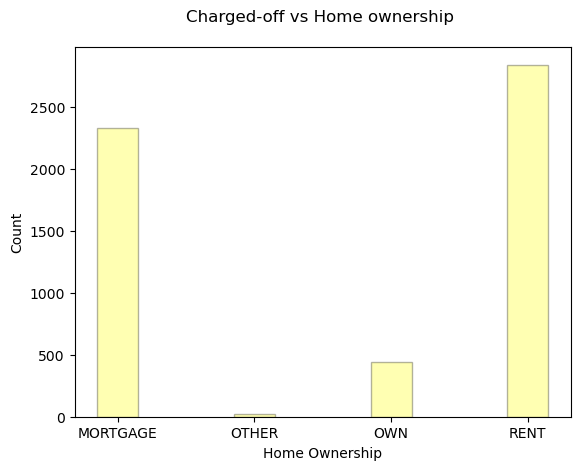

Loan borrowers who live on rent and people who have put their property on mortgage are likely to be defaulters


In [97]:
filtered=data[['loan_status','home_ownership']]
filtered=filtered[filtered['loan_status']=='Charged Off']
defaulters=filtered.groupby(by='home_ownership').count()
x=list(defaulters.index)
y=list(defaulters['loan_status'])
plt.bar(x,y,width=0.3,alpha=0.3,edgecolor='black',color='yellow')
plt.ylabel('Count')
plt.xlabel('Home Ownership')
plt.title('Charged-off vs Home ownership \n')
plt.show()
print('Loan borrowers who live on rent and people who have put their property on mortgage are likely to be defaulters')


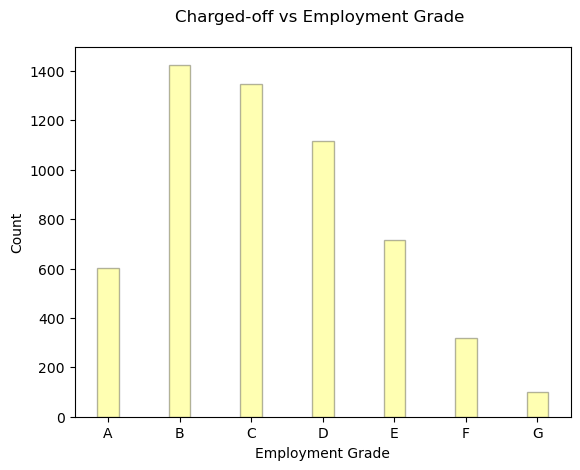

In [99]:
filtered=data[['loan_status','grade']]
filtered=filtered[filtered['loan_status']=='Charged Off']
defaulters=filtered.groupby(by='grade').count()
x=list(defaulters.index)
y=list(defaulters['loan_status'])
plt.ylabel('Count')
plt.xlabel('Employment Grade')
plt.title('Charged-off vs Employment Grade \n')
plt.bar(x,y,width=0.3,alpha=0.3,edgecolor='black',color='yellow')

plt.show()